# Exploracion

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Master /Segundo semestre/SIGE/diabetes.csv', sep=';')

# Convierto las columnas a numéricos
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,-999,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


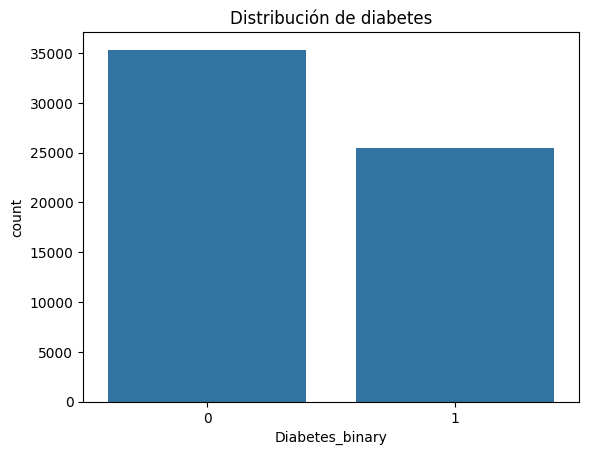

       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     60796.000000  60796.000000  60796.000000  60796.000000   
mean          0.418613      0.531926      0.501809     -8.748437   
std           0.493336      0.498984      0.500001     98.113139   
min           0.000000      0.000000      0.000000   -999.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.000000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  60796.000000  60796.000000  60796.000000          60796.000000   
mean       3.516333      0.471890      0.057537             -9.741118   
std      161.606288      0.499213      0.232867             98.849196   
min     -999.000000      0.000000      0.000000           -999.000000   
25%       25.000000   

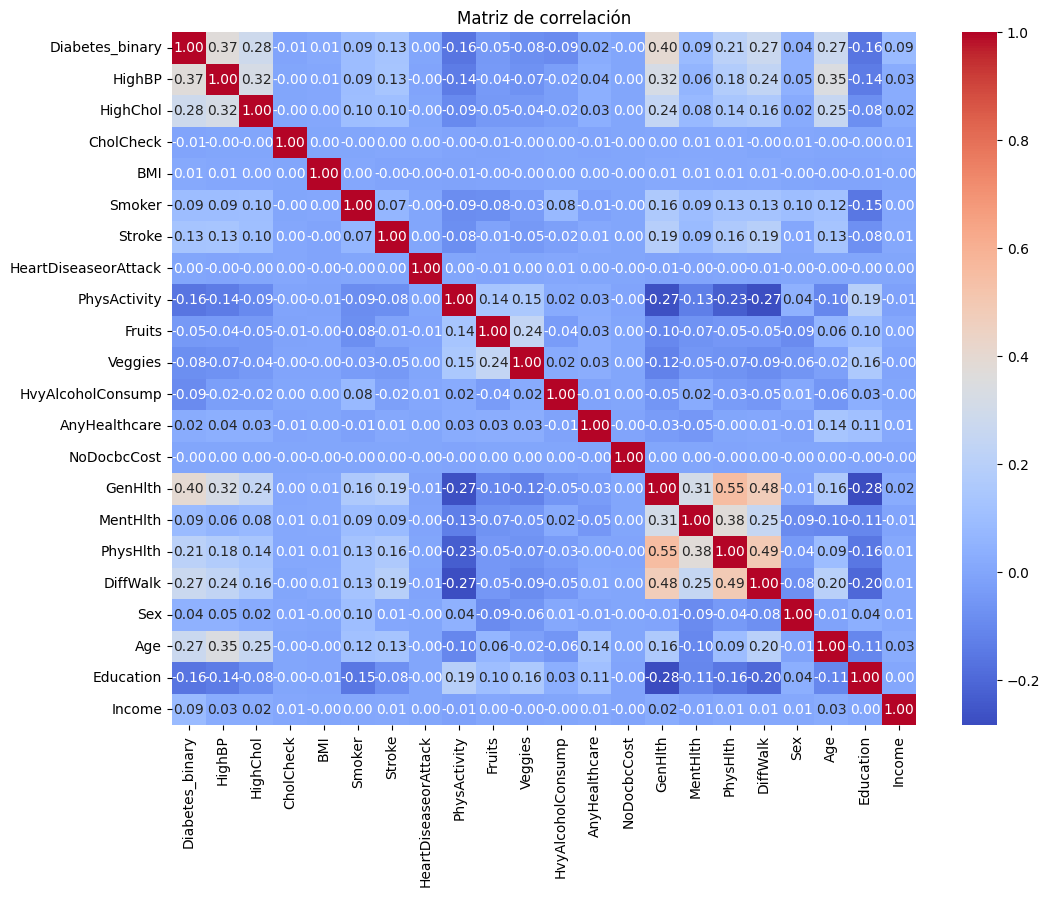

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de Diabetes_binary
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Distribución de diabetes')
plt.show()

print(df.describe())

# Matriz de correlación
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

# Pre-procesamiento


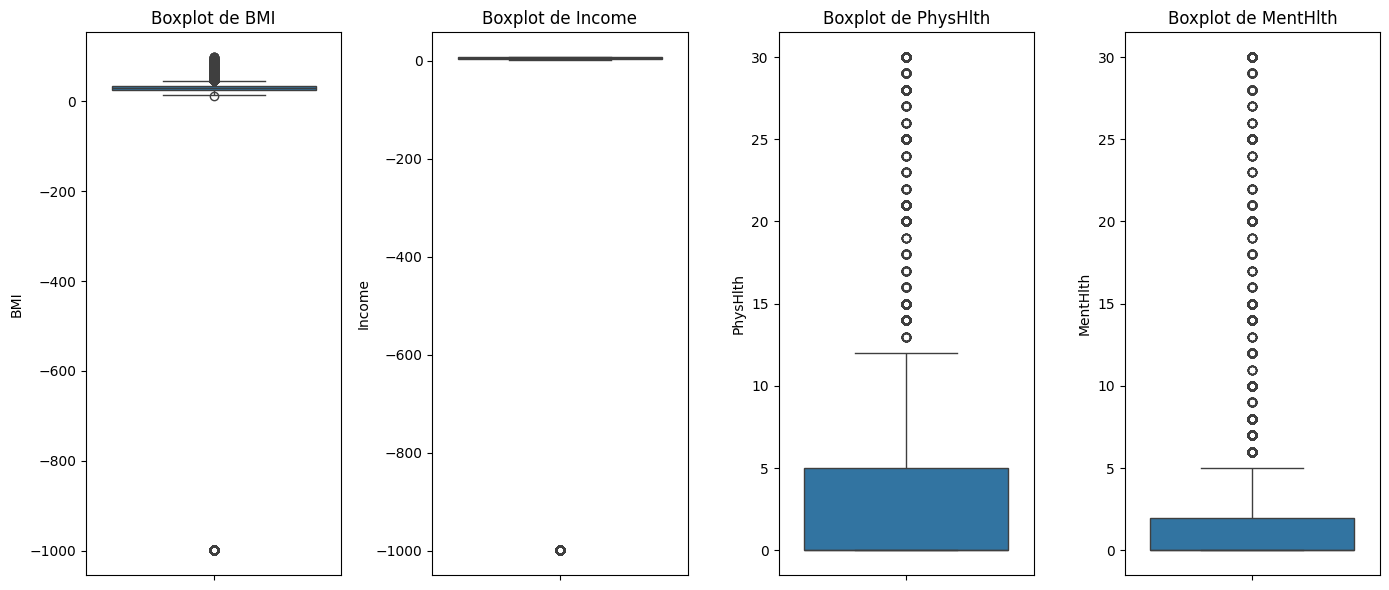

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14, 6))
variables = ['BMI', 'Income', 'PhysHlth', 'MentHlth']

for i, var in enumerate(variables):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()

# Reemplazo -999 con NaN
df.replace(-999, pd.NA, inplace=True)

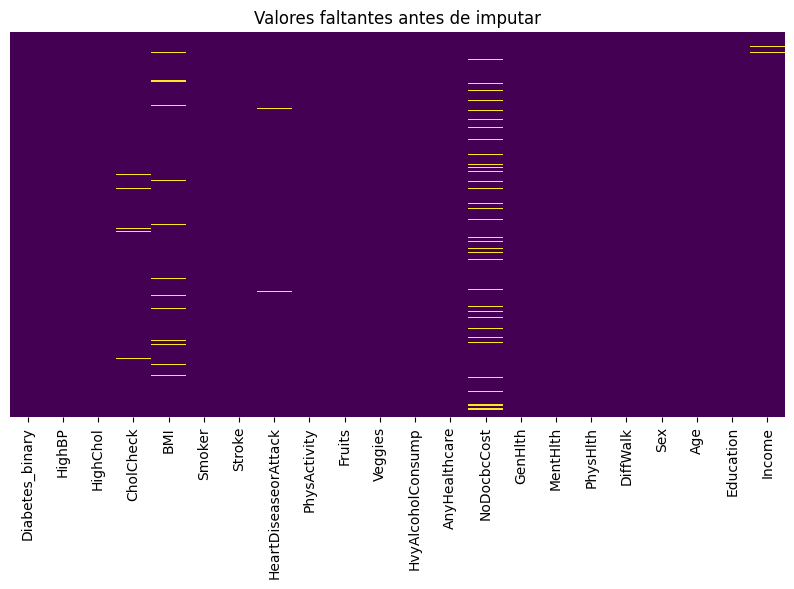

In [ ]:
# Mapa de calor
plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Valores faltantes antes de imputar")
plt.show()

In [ ]:
from sklearn.impute import KNNImputer

pd.set_option('future.no_silent_downcasting', True)

# Mediana para valores numéricos
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())

# Moda
df['NoDocbcCost'] = df['NoDocbcCost'].fillna(df['NoDocbcCost'].mode()[0])
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].fillna(df['HeartDiseaseorAttack'].mode()[0])
df['CholCheck'] = df['CholCheck'].fillna(df['CholCheck'].mode()[0])

# Compruebo que ya no faltan valores
print(df.isna().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


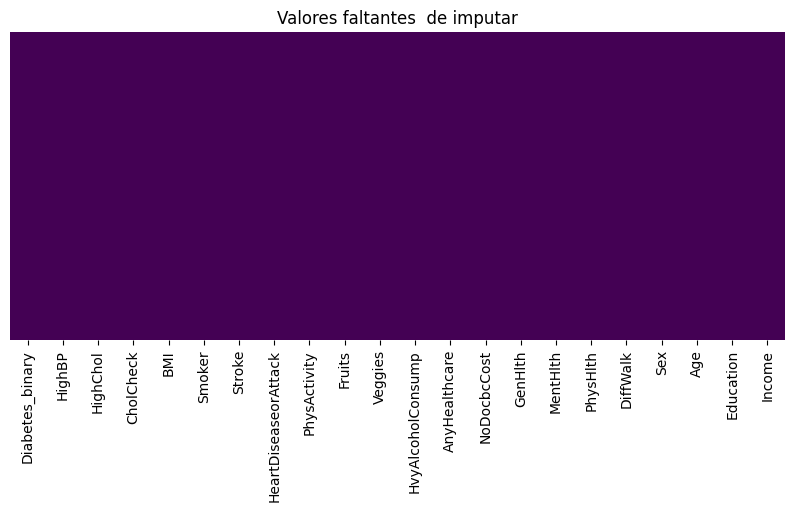

In [ ]:
# Mapa de calor
plt.figure(figsize=(10, 4))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Valores faltantes  de imputar")
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import cross_val_predict

# Incoherencias
inconsistentes = df[df['Income'] < 0]
df = df.drop(inconsistentes.index)

inconsistentes2 = df[
    ((df['PhysHlth'] > 25) & (df['MentHlth'] > 25)) &
    (df['GenHlth'] <= 2)
]
df = df.drop(inconsistentes2.index)

#inconsistentes3 = df[(df['AnyHealthcare'] == 0) & (df['CholCheck'] == 1)]
#df = df.drop(inconsistentes3.index)

suma = inconsistentes + inconsistentes2
print(f"Registros eliminados por inconsistencia clínica: {len(suma)}")

Registros eliminados por inconsistencia clínica: 47


In [ ]:
from scipy.stats.mstats import winsorize
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest

variables_numericas = ['BMI', 'Income', 'PhysHlth', 'MentHlth']

iso = IsolationForest(contamination=0.02, random_state=42)
outliers = iso.fit_predict(df[variables_numericas])

df['outlier'] = outliers

print(f"Registros etiquetados como outliers: {(df['outlier'] == -1).sum()}")

Registros etiquetados como outliers: 1215


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Selección de características con Mutual Information
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_selected = selector.fit_transform(X, y)

# Nombres de variables seleccionadas con puntuaciones relevantes
scores = selector.scores_
selected_features_mi = X.columns[scores > 0.01]

print("Variables seleccionadas por Mutual Information:")
print(selected_features_mi.tolist())

X = df[selected_features_mi]

# Mutual Info
mi_scores = mutual_info_classif(X, y)
mi_importances = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
X = X.apply(pd.to_numeric, errors='coerce')
xgb.fit(X, y)
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)

importances_df = pd.DataFrame({
    'Mutual Info': mi_importances,
    'Random Forest': rf_importances,
    'XGBoost': xgb_importances
})

print("Comparación de importancias de características:")
print(importances_df)

Variables seleccionadas por Mutual Information:
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'AnyHealthcare', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income']
Comparación de importancias de características:
                      Mutual Info  Random Forest   XGBoost
Age                      0.047050       0.153503  0.033241
AnyHealthcare            0.008921       0.009109  0.009424
BMI                      0.057281       0.219599  0.025530
CholCheck                0.013125       0.006327  0.047924
DiffWalk                 0.039632       0.028720  0.025317
Education                0.018869       0.072578  0.009669
GenHlth                  0.088318       0.110118  0.126540
HeartDiseaseorAttack     0.023719       0.022398  0.034475
HighBP                   0.076781       0.074403  0.577714
HighChol                 0.049070       0.040168  0.054881
Income                   0.027799       0.108094  0.012256
PhysActivi

In [ ]:
importances_sum = importances_df.sum(axis=1)

top_n = 10
top_features_total = importances_sum.nlargest(top_n).index.tolist()

print("Top 10 características más importantes en total:")
print(top_features_total)

Top 10 características más importantes en total:
['HighBP', 'GenHlth', 'BMI', 'Age', 'Income', 'HighChol', 'PhysHlth', 'Education', 'DiffWalk', 'HeartDiseaseorAttack']


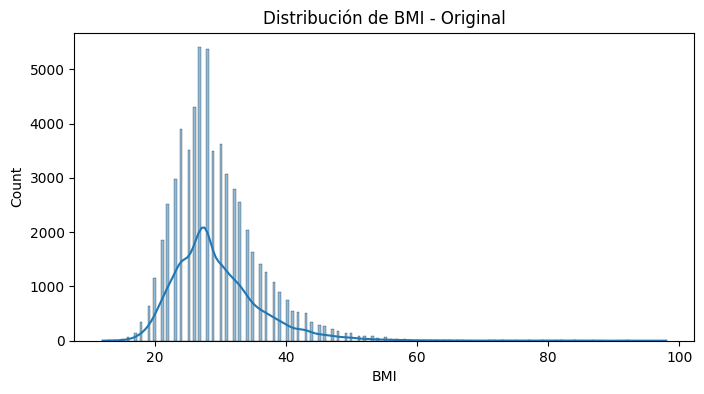

In [ ]:
# Antes del escalado
plt.figure(figsize=(8, 4))
sns.histplot(df['BMI'], kde=True)
plt.title("Distribución de BMI - Original")
plt.show()

<Figure size 1200x600 with 0 Axes>

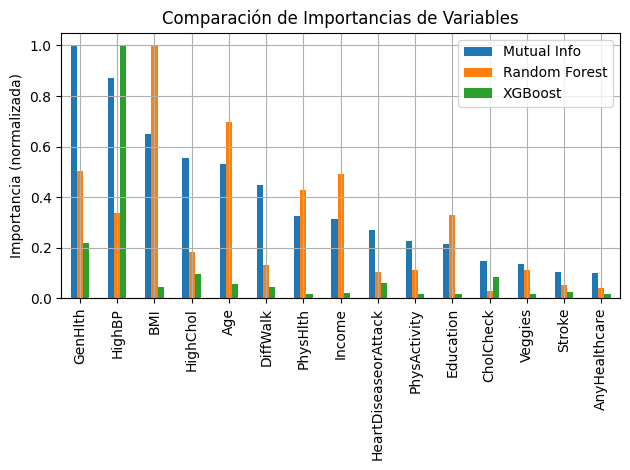

In [ ]:
importances_df = importances_df / importances_df.max()

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualización de importancias
plt.figure(figsize=(12, 6))
importances_df.sort_values(by='Mutual Info', ascending=False).plot(kind='bar')
plt.title("Comparación de Importancias de Variables")
plt.ylabel("Importancia (normalizada)")
plt.grid(True)
plt.tight_layout()
plt.show()

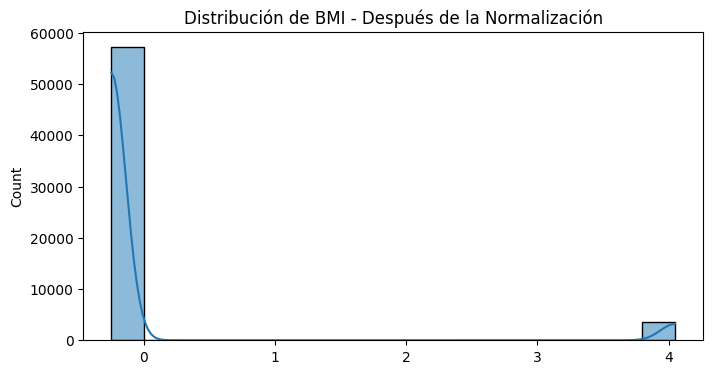

In [ ]:
# Después del escalado
bmi_scaled = X_scaled[:, df.columns.get_loc('BMI')]
plt.figure(figsize=(8, 4))
sns.histplot(bmi_scaled, kde=True)
plt.title("Distribución de BMI - Después de la Normalización")
plt.show()

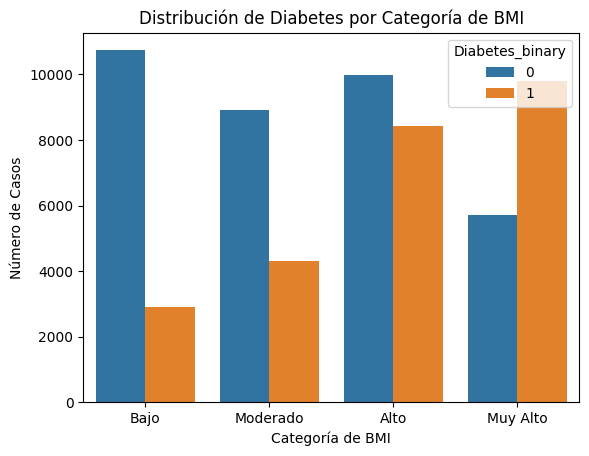

Frecuencia de clases en cada bin de BMI:
Diabetes_binary      0     1
BMI_kbin_label              
Alto              9969  8414
Bajo             10738  2898
Moderado          8909  4314
Muy Alto          5707  9800


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt

kbins = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
df['BMI_kbin'] = kbins.fit_transform(df[['BMI']])

# Mapeo
df['BMI_kbin_label'] = df['BMI_kbin'].map({
    0: 'Bajo',
    1: 'Moderado',
    2: 'Alto',
    3: 'Muy Alto'
})

sns.countplot(x='BMI_kbin_label', hue='Diabetes_binary', data=df, order=['Bajo', 'Moderado', 'Alto', 'Muy Alto'])
plt.title("Distribución de Diabetes por Categoría de BMI")
plt.xlabel("Categoría de BMI")
plt.ylabel("Número de Casos")
plt.show()

bmi_counts = pd.crosstab(df['BMI_kbin_label'], df['Diabetes_binary'])
print("Frecuencia de clases en cada bin de BMI:")
print(bmi_counts)

# Clasificación

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = X_scaled
y = df['Diabetes_binary']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Aplico SMOTE al train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Antes de SMOTE:", y_train.value_counts())
print("Después de SMOTE:", y_train_smote.value_counts())

Antes de SMOTE: Diabetes_binary
0    21145
1    15304
Name: count, dtype: int64
Después de SMOTE: Diabetes_binary
1    21145
0    21145
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

Logistic Regression
  Accuracy:           0.7463
  AUC:                0.8220
  Precision:          0.7009
  Recall: 0.6746
  Specificity:        0.7969
  F1 Score:           0.6875
  Balanced Accuracy:  0.7357

Random Forest
  Accuracy:           0.7144
  AUC:                0.7817
  Precision:          0.6525
  Recall: 0.6624
  Specificity:        0.7510
  F1 Score:           0.6574
  Balanced Accuracy:  0.7067

Gradient Boosting
  Accuracy:           0.7503
  AUC:                0.8274
  Precision:          0.6939
  Recall: 0.7093
  Specificity:        0.7793
  F1 Score:           0.7015
  Balanced Accuracy:  0.7443



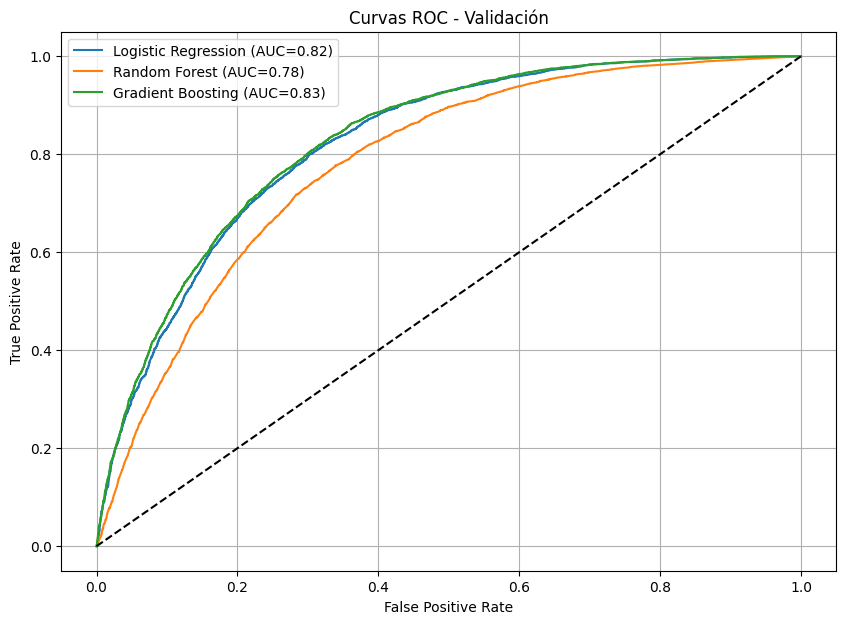

In [ ]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, precision_score,
    confusion_matrix, f1_score, roc_curve, balanced_accuracy_score
)

def train_and_evaluate(models, X_train, y_train, X_val, y_val):
    results = {}
    plt.figure(figsize=(10, 7))

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1]

        acc = accuracy_score(y_val, y_pred)
        auc = roc_auc_score(y_val, y_proba)
        recall = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        balanced_acc = balanced_accuracy_score(y_val, y_pred)

        # Matriz de confusión para especificidad
        cm = confusion_matrix(y_val, y_pred)
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0

        results[name] = {
            'Accuracy': acc,
            'AUC': auc,
            'Precision': precision,
            'Recall (Sensitivity)': recall,
            'Specificity': specificity,
            'F1 Score': f1,
            'Balanced Accuracy': balanced_acc
        }

        print(f"{name}")
        print(f"  Accuracy:           {acc:.4f}")
        print(f"  AUC:                {auc:.4f}")
        print(f"  Precision:          {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  Specificity:        {specificity:.4f}")
        print(f"  F1 Score:           {f1:.4f}")
        print(f"  Balanced Accuracy:  {balanced_acc:.4f}")
        print()

        # Curva ROC
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('Curvas ROC - Validación')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

results = train_and_evaluate(models, X_train, y_train, X_val, y_val)